In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.15.0


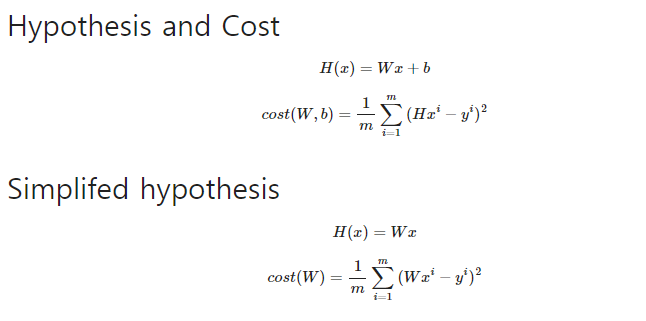

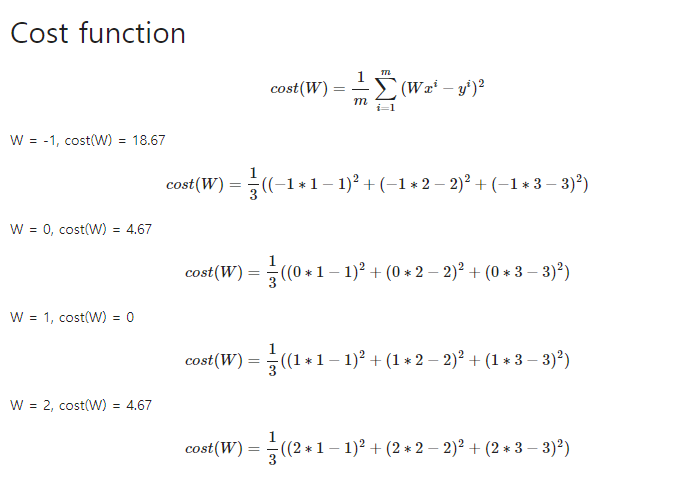

예측값, 실제값 사이의 거리를 통해 코스트 계산

텐서플로우에서의 코스트 함수


In [3]:
X=np.array([1,2,3])
Y=np.array([1,2,3])

def cost_func(W,X,Y):
  hypothesis=X*W
  return tf.reduce_mean(tf.square(hypothesis-Y))

W_values=np.linspace(-3,5,num=15)
cost_values=[]

for feed_W in W_values:
  curr_cost=cost_func(feed_W,X,Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,6)#사이즈 지정

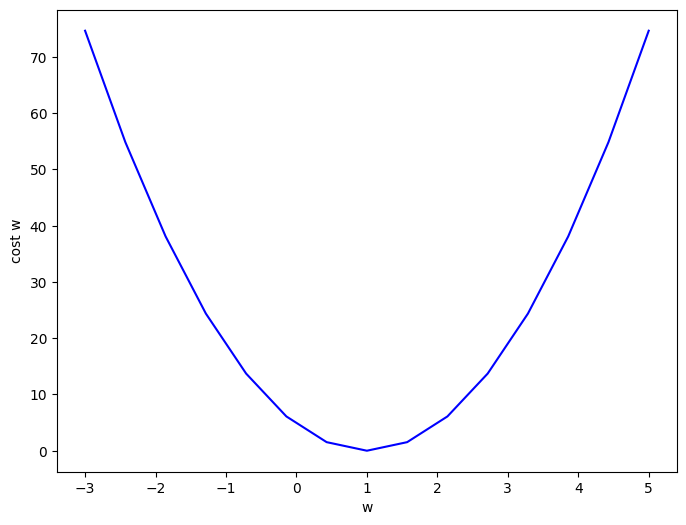

In [5]:
plt.plot(W_values,cost_values,"b")
plt.ylabel('cost w')
plt.xlabel('w')
plt.show()

선형 알고리즘


코스트 최소화
코스트를 최소화하는 w,b 찾기

0,0부터 시작하기

w,b를 계속 수정함

부분최소에 머물지 말기

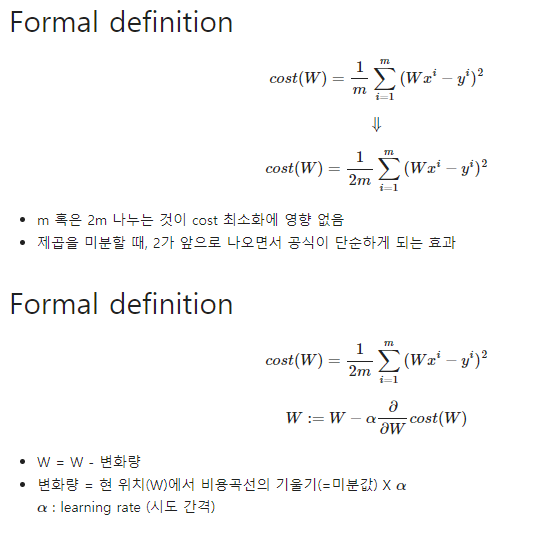

w는 이전 w의 변화율의 영향을 받아 수정됨

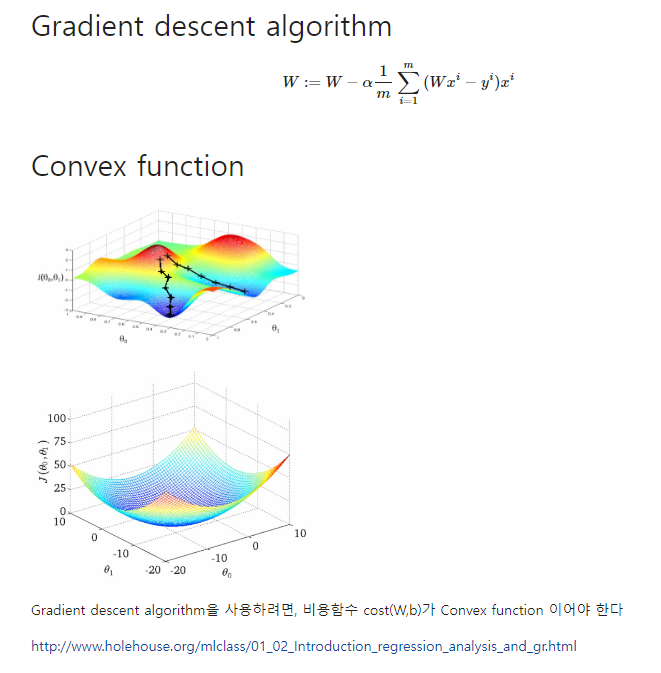

In [6]:
tf.random.set_seed(0)

In [7]:
x_data=[1.,2.,3.,4.]
y_data=[1.,3.,5.,7.]

W=tf.Variable(tf.random.normal((1,),-100.,100.))#평균 -100, 표준편차 100인 무작위 값 생성
for step in range(300):
  hypothesis=W*X
  cost=tf.reduce_mean(tf.square(hypothesis-Y))

  alpha=0.01
  gradient=tf.reduce_mean(tf.multiply(tf.multiply(W,X)-Y,X))
  descent=W-tf.multiply(alpha,gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(
      step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [8]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [9]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)

    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))


    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004
